In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Cropping2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras import regularizers
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.utils import plot_model
import graphviz, pydot, pydotplus
from sklearn.model_selection import train_test_split
import tensorflow as tf

В предыдущем блоке мы загружали необходимые библиотеки

В следующем блоке мы выгружаем обращаемся к модели, чтобы к ней корректно обратиться, необходимо выгрузить модель в файлы colab и прописать в ковычках путь к ней

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

from_file = CatBoostClassifier()

m = from_file.load_model("/content/cb_88_91.pkl")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


В следующем блоке мы обращаемся к фалу с данными, чтобы к нему корректно обратиться, необходимо выгрузить файл в файлы colab и прописать в ковычках путь к нему

In [ ]:
measurements = []
classifications = []
points = []

#скопируйте путь к файлу
path = "/content/pretumor_patient060422_633nm_center2900_obj100_power100_1s_3acc.txt"
df = pd.read_csv(path, sep='\t',skiprows=[0],
                 header=None, names=['X', 'Y', 'Wave', 'Intensity'])
df= df[len(df)//1015//2*1015:]
for i in range(len(df)//1015):
    measurements.append(df[['Intensity']][i*1015:(i+1)*1015].to_numpy())
    classifications.append([1,0])
    points.append(df[["X", "Y"]].iloc[i * 1015].values)
        


In [ ]:
X = np.asarray(measurements)
y1 = np.asarray(classifications)
X = X.reshape(-1, 1015)
y = np.argmax(y1, axis=1)


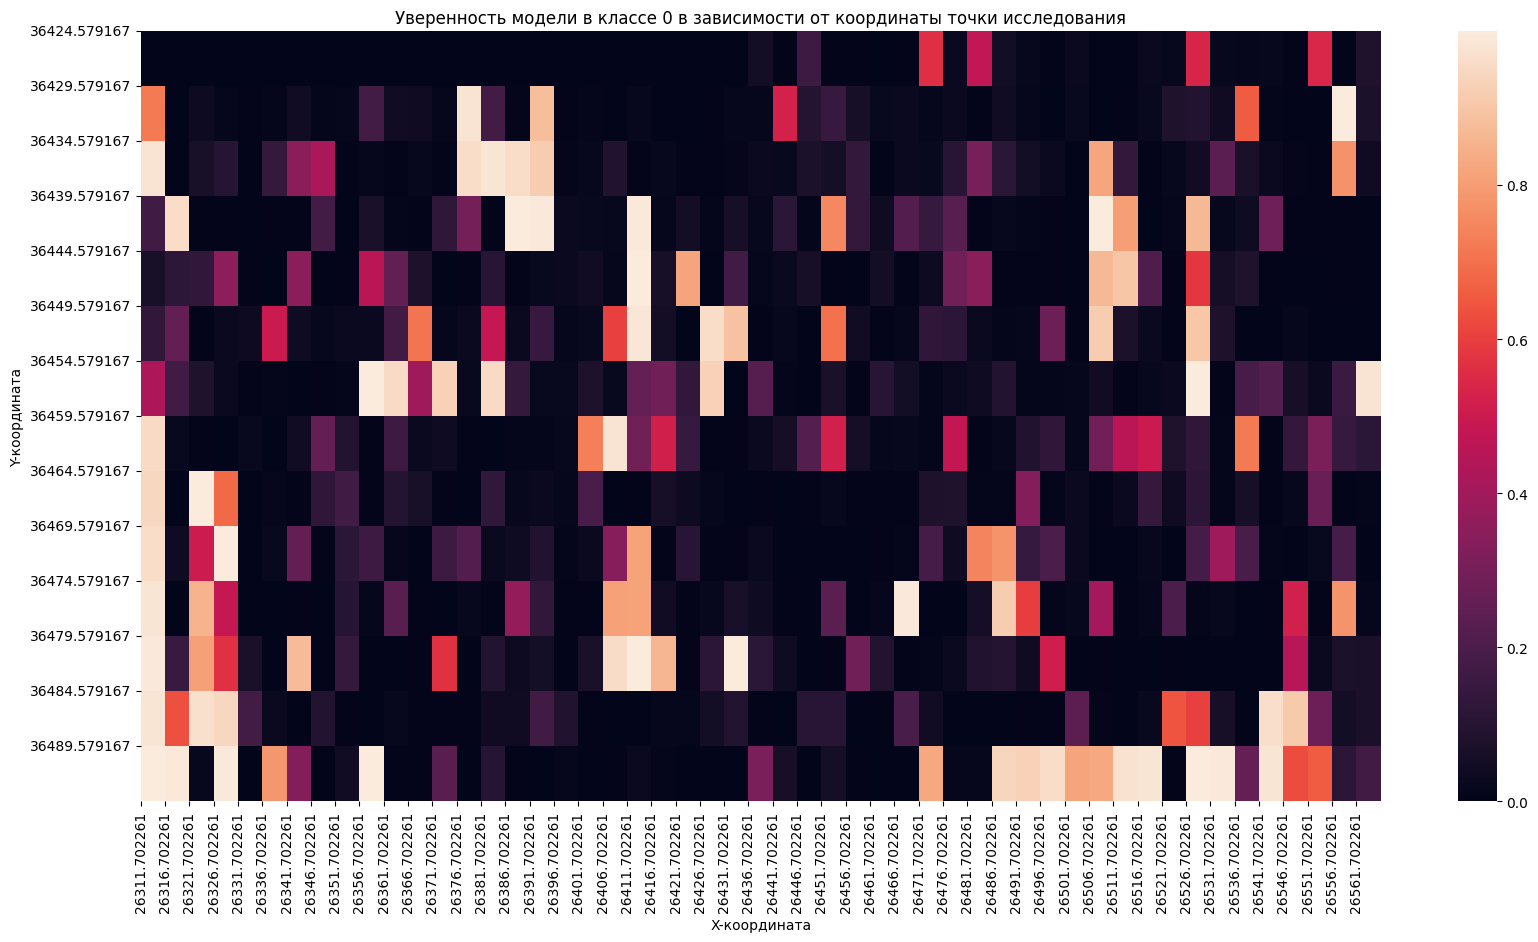

In [ ]:
points = np.array(points)
import seaborn as sns
plt.figure(figsize=(20, 10))
x_coords = np.unique(points[:, 0])
y_coords = np.unique(points[:, 1])
x_map = {v: i for i, v in enumerate(sorted(x_coords))}
y_map = {v: i for i, v in enumerate(sorted(y_coords))}
data = np.zeros((len(y_coords), len(x_coords)))
for (x_c, y_c), proba in zip(points, m.predict_proba(X)[:, 0]):
    data[y_map[y_c], x_map[x_c]] = proba
sns.heatmap(data)
plt.xticks(list(x_map.values()), list(x_map.keys()), rotation=90)
plt.yticks(list(y_map.values()), list(y_map.keys()), rotation=0)
plt.title("Уверенность модели в классе 0 в зависимости от координаты точки исследования")
plt.xlabel("X-координата")
plt.ylabel("Y-координата");
